In [9]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

# Regression with a Multi Layer Perceptron

### Define the True Function and Generate the Sample Data

In [2]:
def f(x):
    return math.sin(x)
print f(math.pi / 2)

1.0


In [3]:
num_points = 50

In [4]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, num_points)})
f_points['y'] = f_points.x.apply(f)

In [5]:
sample = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
sample['y'] = sample.x.apply(lambda x: f(x))

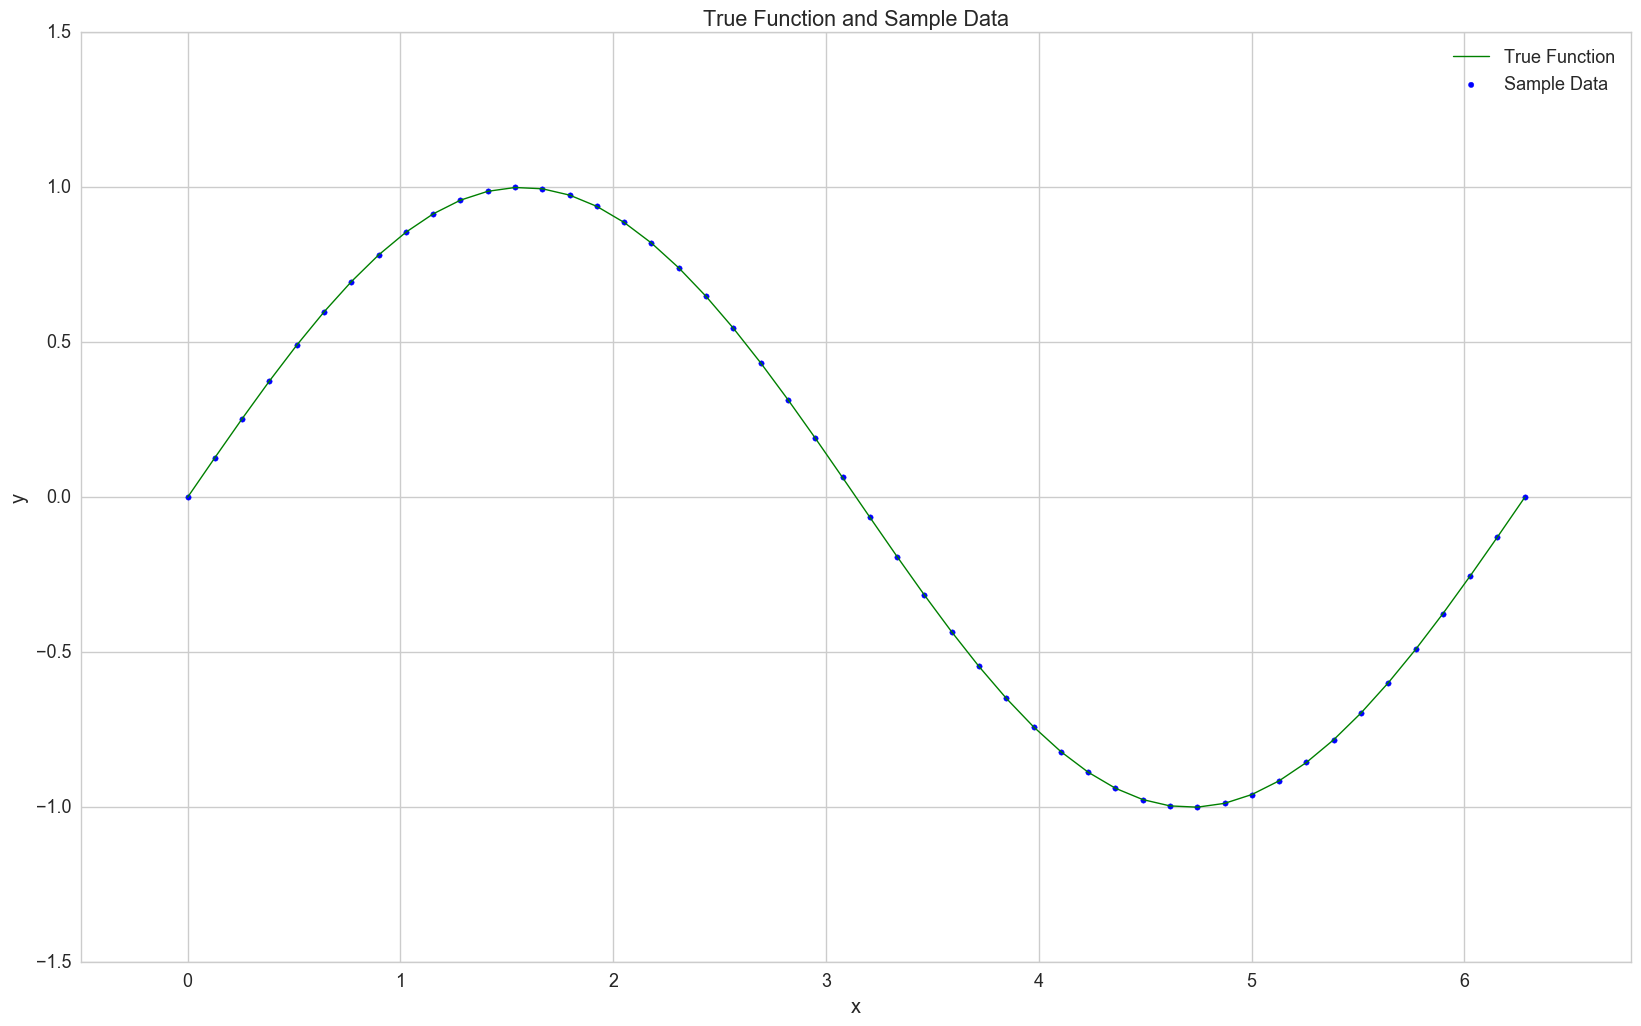

In [6]:
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Sample Data')
_ = plt.legend()

### Regression with a MLP with One Hidden Layer and 3 Hidden Neurons

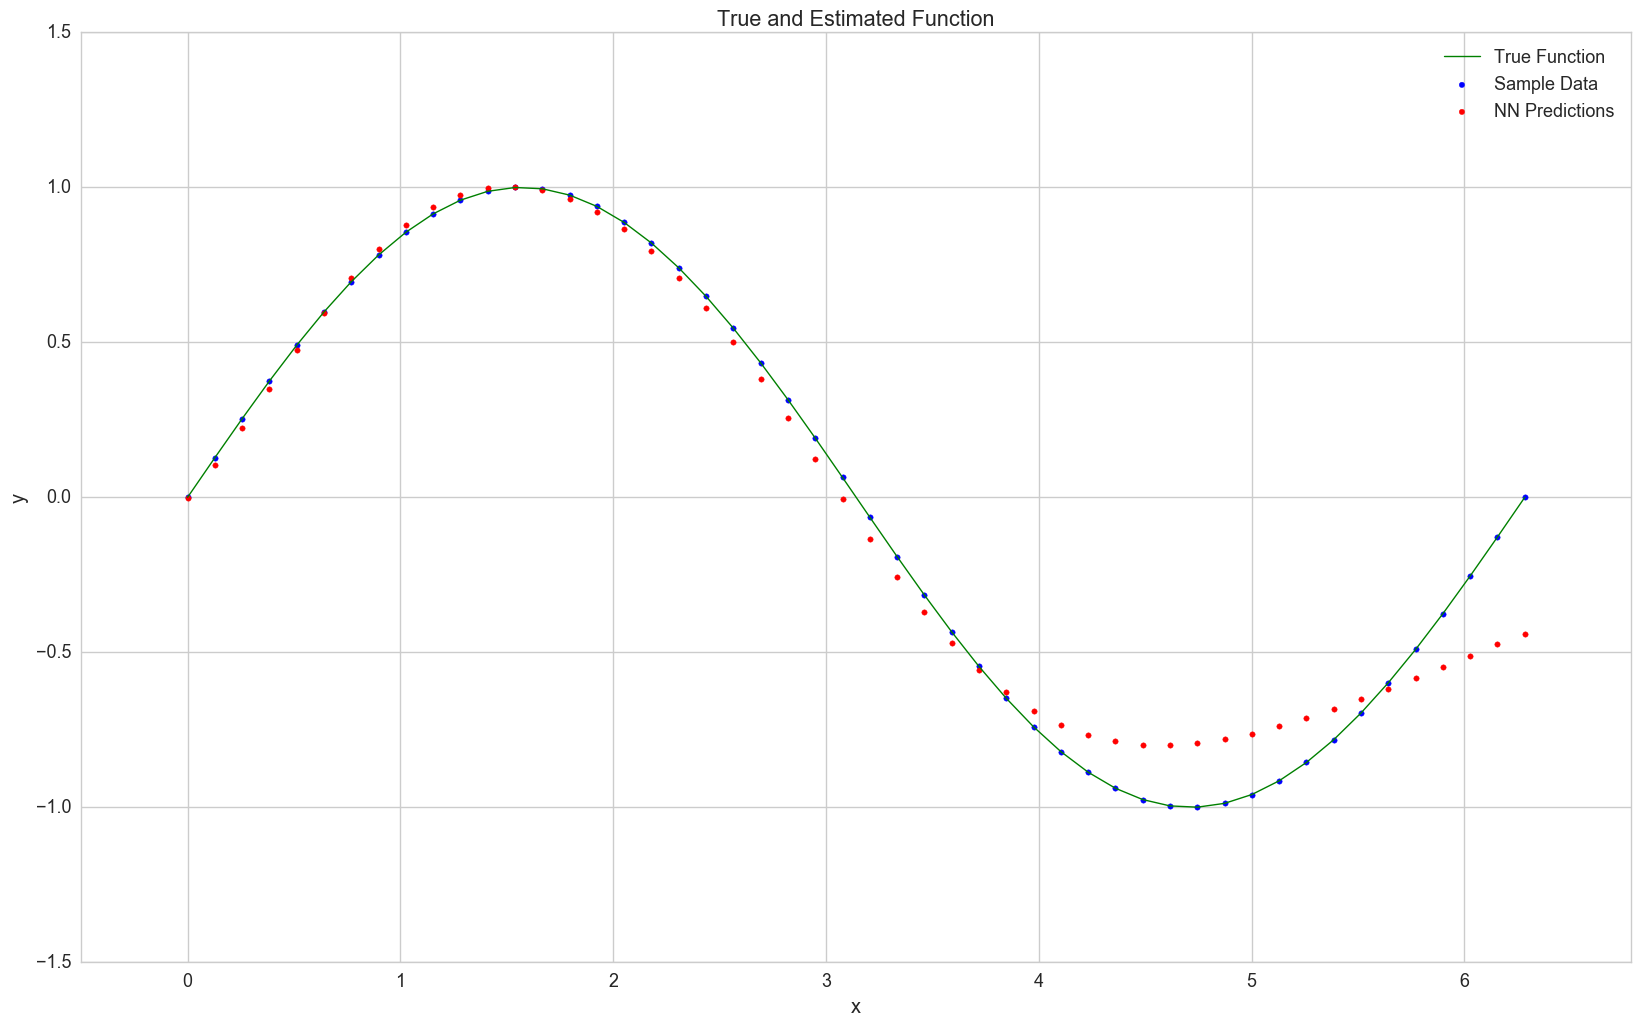

In [7]:
best_pred = None
best_score = None
best_model = None

for i in range(100):
    m = sklearn.neural_network.MLPRegressor(
            hidden_layer_sizes=(3,),
            activation='tanh',
            max_iter=1000,
            alpha=0.001,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-09,
            learning_rate_init=0.01,
            power_t=0.5,
            momentum=0.9,
            nesterovs_momentum=True,
            random_state=i)
    
    m.fit(
        sample.x.values.reshape(-1, 1),
        sample.y.values)

    pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, num_points)})
    pred['y'] = m.predict(pred.x.values.reshape(-1, 1))
    
    score = sklearn.metrics.mean_squared_error(sample.y, pred.y)
    
    if (best_score is None) or (score < best_score):
        best_pred = pred
        best_score = score
        best_model = m

pred = best_pred
m = best_model

_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.scatter(pred.x, pred.y, color='r', marker='o', s=dotsize, label='NN Predictions')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend()

### Plot the Basis Functions of the Model

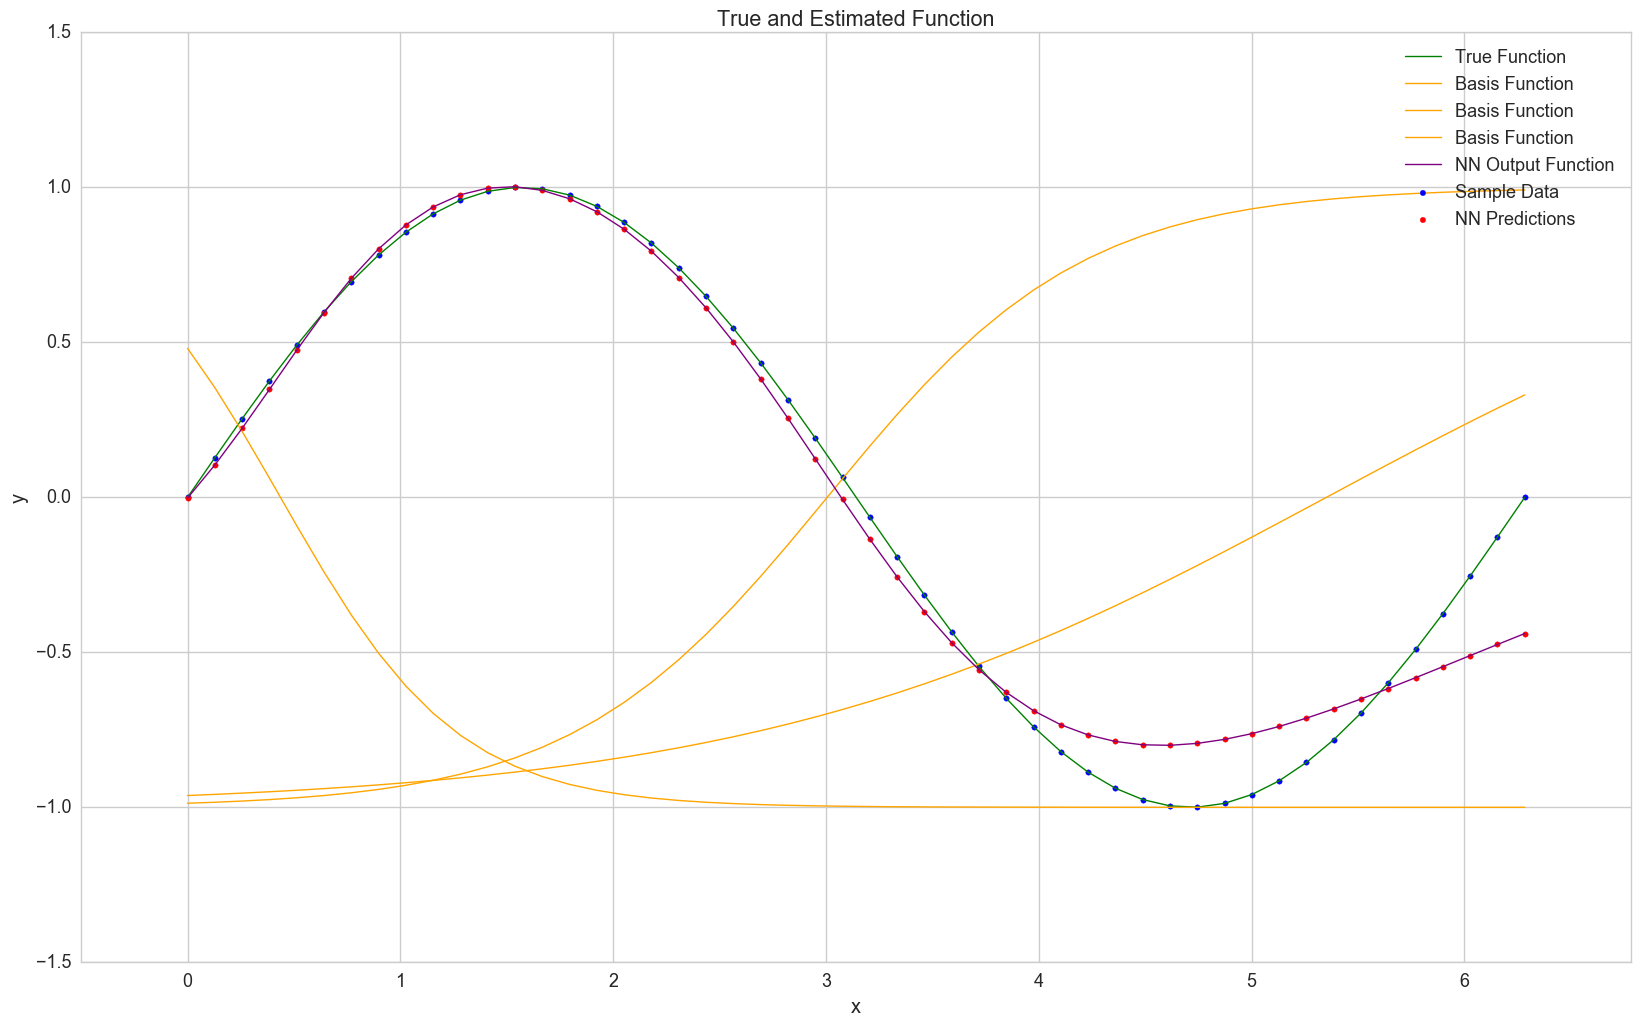

In [8]:
plt.figure(figsize=(20, 12))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.scatter(pred.x, pred.y, color='r', marker='o', s=dotsize, label='NN Predictions')

for i in range(3):
    _ = plt.plot(
            pred.x,
            np.tanh(m.coefs_[0][0][i] * pred.x + m.intercepts_[0][i]),
            '-',
            linewidth=linewidth,
            label='Basis Function',
            color='orange')

_ = plt.plot(
        pred.x,
        (m.coefs_[1][0][0] * np.tanh(m.coefs_[0][0][0] * pred.x + m.intercepts_[0][0]) +
        m.coefs_[1][1][0] * np.tanh(m.coefs_[0][0][1] * pred.x + m.intercepts_[0][1]) +
        m.coefs_[1][2][0] * np.tanh(m.coefs_[0][0][2] * pred.x + m.intercepts_[0][2]) +
        m.intercepts_[1][0]),
        '-',
        linewidth=linewidth,
        label='NN Output Function',
        color='purple')
    
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend()